# Lending Club Case Study

### Reading the CSV File

In [1]:
import pandas  as pd
import seaborn as sb
import numpy   as np
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import plotly.io as pio
#pio.renderers.default = "colab" #Colab configs for plotly

In [2]:
loan = pd.read_csv("loan.csv")

/var/folders/p6/klf5stcd60n3__hy6dqwl0xh0000gn/T/ipykernel_36579/3592418794.py:1: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [6]:
df = pd.DataFrame(loan)
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Data Cleaning

Drop Loan behaviourial fields as per the suggestion
1) delinq_2yrs<br>
2) earliest_cr_line<br>
3) inq_last_6mths<br>
4) open_acc<br>
5) pub_rec<br>
6) revol_bal<br>
7) revol_util<br>
8) total_acc<br>
9) out_prncp<br>
10) out_prncp_inv<br>
11) total_pymnt<br>
12) total_pymnt_inv<br>
13) total_rec_prncp<br>
14) total_rec_int<br>
15) total_rec_late_fee<br>
16) recoveries<br>
17) collection_recovery_fee<br>
18) last_pymnt_d<br>
19) last_pymnt_amnt<br>
20) last_credit_pull_d<br>
21) application_type

In [7]:
df = df.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type'], axis=1)


*Drop the columns which contains same values in all rows*

In [8]:
for col in df.columns:  # Loop through columns
  if len(df[col].unique()) == 1:  # Find unique values in column along with their length and if length is == 1 then it contains same values
    df.drop([col], axis=1, inplace=True)  # Drop the column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

       mths_since_last_delinq  mths_since_last_record  \
count            14035.000000             2786.000000   
mean                35.900962               69.698134   
std                 22.020060               43.822529   
min                  0.000000                0.000000   
25%                 18.000000               22.000000   
50%                 34.000000               90.000000   
75%                 52.000000              104.000000   
max                120.000000              129.000000   

       collections_12_mths_ex_med  chargeoff_within_12_mths  \
count                     39661.0                   39661.0   
mean                          0.0                       0.0   
std                           0.0                       0.0   
min                           0.0                       0.0   
25%                           0.0                       0.0   
50%                           0.0                       0.0   
75%                           0.0                       0.0   
max                           0.0                       0.0   

       pub_rec_bankruptcies  tax_liens  
count          39020.000000    39678.0  
mean               0.043260        0.0  
std                0.204324        0.0  
min                0.000000        0.0  
25%                0.000000        0.0  
50%                0.000000        0.0  
75%                0.000000        0.0  
max                2.000000        0.0

*Drop URL which is a non-significant field*

In [11]:
df = df.drop(columns = 'url')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Remove the word years in emp_length

In [13]:
df['emp_length'] = df['emp_length'].str.replace(' years','')
df['emp_length'] = df['emp_length'].str.replace(' year','')
df['emp_length'] = df['emp_length'].str.replace('+','')
df['emp_length'] = df['emp_length'].str.replace('< ','')
#df['emp_length'] = df['emp_length'].str.replace('nan','0')
df['emp_length'] = df['emp_length'].fillna('0')

/var/folders/p6/klf5stcd60n3__hy6dqwl0xh0000gn/T/ipykernel_36579/2446633840.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



**Variables:**

1) <u>Categorical:</u><br>
     i) Ordered - term, grade, sub_grade, loan_status<br>
    ii) Unordered - emp_title, home_ownership, verification_status, purpose, title  

2) <u>Quantitative/Numeric:</u>
   <br>loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, emp_length, annual_inc, dti

(issue_d, desc, zip_code, addr_state, mths_since_last_delinq, mths_since_last_record, next_pymnt_d, collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies, tax_liens)

## Observation

### Univariate Analysis

**1) Employees in B,C,D grades are defaulting more compared to other grades**
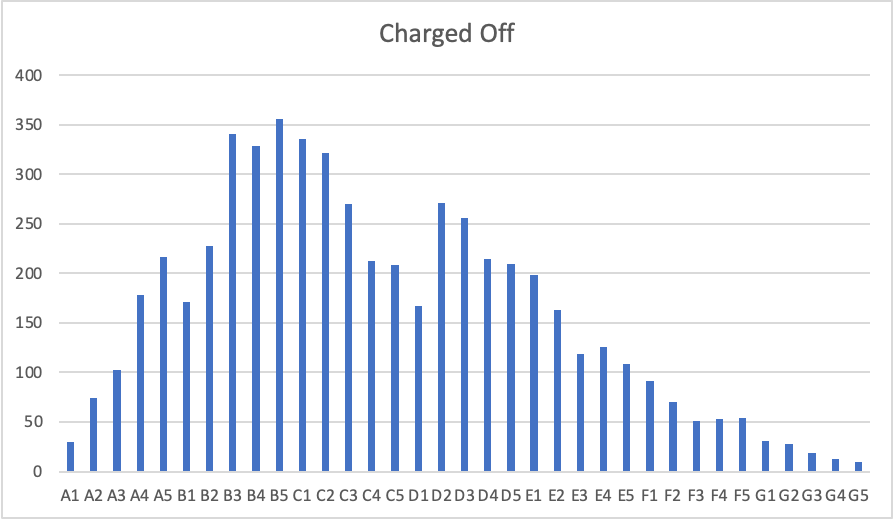

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

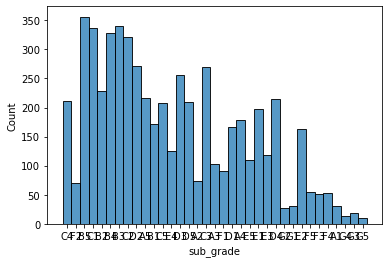

In [14]:
sb.histplot(df[df["loan_status"] == 'Charged Off'].sub_grade,bins=10)

**2) Employess more than 10 years of experience are Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

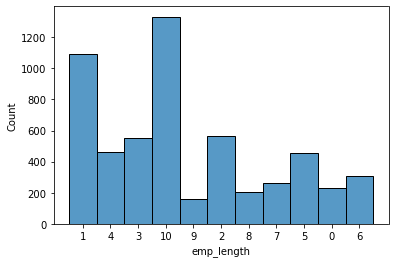

In [15]:
sb.histplot(df[df["loan_status"] == 'Charged Off'].emp_length,bins=10)

**3) Employess who does not own house is Charged Off most of the times**

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

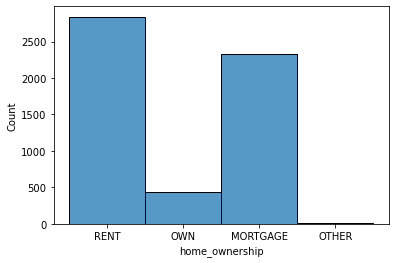

In [16]:
sb.histplot(df[df["loan_status"] == 'Charged Off'].home_ownership,bins=2)

**4) Most of the employees are getting loan for Debt Consolidation**

<AxesSubplot:xlabel='purpose', ylabel='Count'>

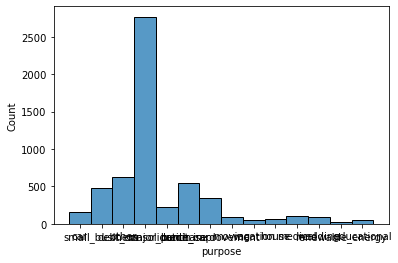

In [17]:
sb.histplot(df[df["loan_status"] == 'Charged Off'].purpose,bins=2)

**5) Employees from CA, NY and FL are Charged Off more**


<AxesSubplot:xlabel='addr_state', ylabel='Count'>

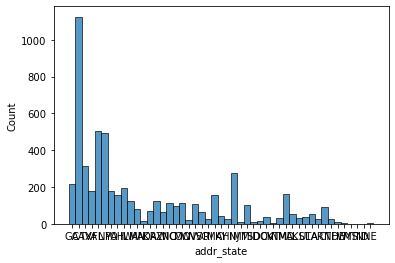

In [18]:
sb.histplot(df[df["loan_status"] == 'Charged Off'].addr_state,bins=2)

### Segmented Univariate Analysis

**1) Mostly the loan amount higher than 10000 are defaulted**

<AxesSubplot:xlabel='loan_amnt_cat', ylabel='Count'>

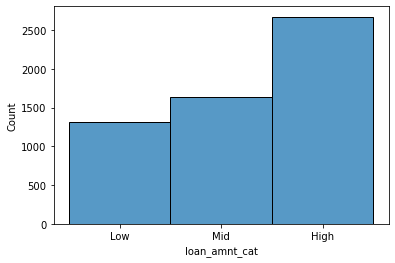

In [19]:
loan_conditions = [ (df['loan_amnt'] > 10000), (df['loan_amnt'] >5000), (df['loan_amnt'] <= 5000) ]
loan_cond_values = ['High', 'Mid', 'Low']
df['loan_amnt_cat'] = np.select(loan_conditions, loan_cond_values)
sb.histplot(df[df["loan_status"] == 'Charged Off'].loan_amnt_cat,bins=2)

**2) Employees lesser than 5 years of experience are Charged Off more**

<AxesSubplot:xlabel='emp_sen_level', ylabel='Count'>

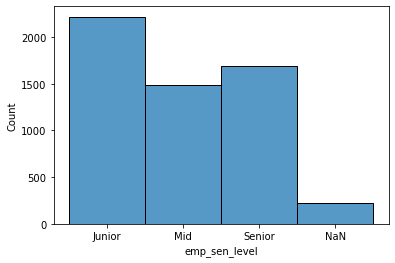

In [20]:
emp_len_conditions = [ (df['emp_length'] == '10'), (df['emp_length'] == '9'), (df['emp_length'] == '8'), (df['emp_length'] == '7'), (df['emp_length'] == '6'), (df['emp_length'] == '5'),(df['emp_length'] == '4'), (df['emp_length'] == '3'), (df['emp_length'] == '2'),(df['emp_length'] == '1'), (df['emp_length'] == '0'), ]
emp_len_cond_values = ['Senior', 'Senior', 'Senior','Mid','Mid','Mid','Mid','Junior','Junior','Junior','NaN']
df['emp_sen_level'] = np.select(emp_len_conditions, emp_len_cond_values)
sb.histplot(df[df["loan_status"] == 'Charged Off'].emp_sen_level,bins=10)

**3) Employees with lower Credit Risk (Higher DTI) is Charged off more**

<AxesSubplot:xlabel='credit_risk', ylabel='Count'>

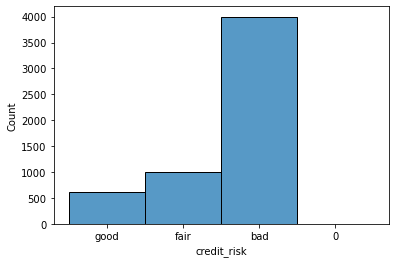

In [21]:
dti_conditions  = [ (df['dti'] > 10), (df['dti'] > 5), (df['dti'] < 5) ]
dti_cond_values = ['bad', 'fair', 'good']
df['credit_risk'] = np.select(dti_conditions, dti_cond_values)
sb.histplot(df[df["loan_status"] == 'Charged Off'].credit_risk,bins=4)

### BiVariate Analysis

**1) Chances of default is higher in the employees who are less than or equal to 5 years. However employess more than 10 years of experience are Charged off more than anyone else**



<AxesSubplot:xlabel='addr_state', ylabel='Count'>

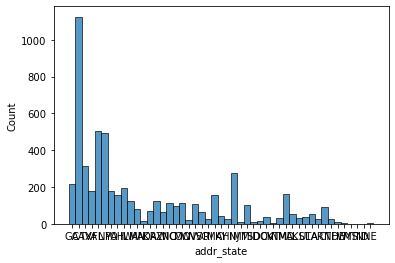

In [22]:
sb.histplot(df[df["loan_status"] == 'Charged Off'].addr_state,bins=10)

2) Loans which are more than 10000 are mostly defaulted among all employees

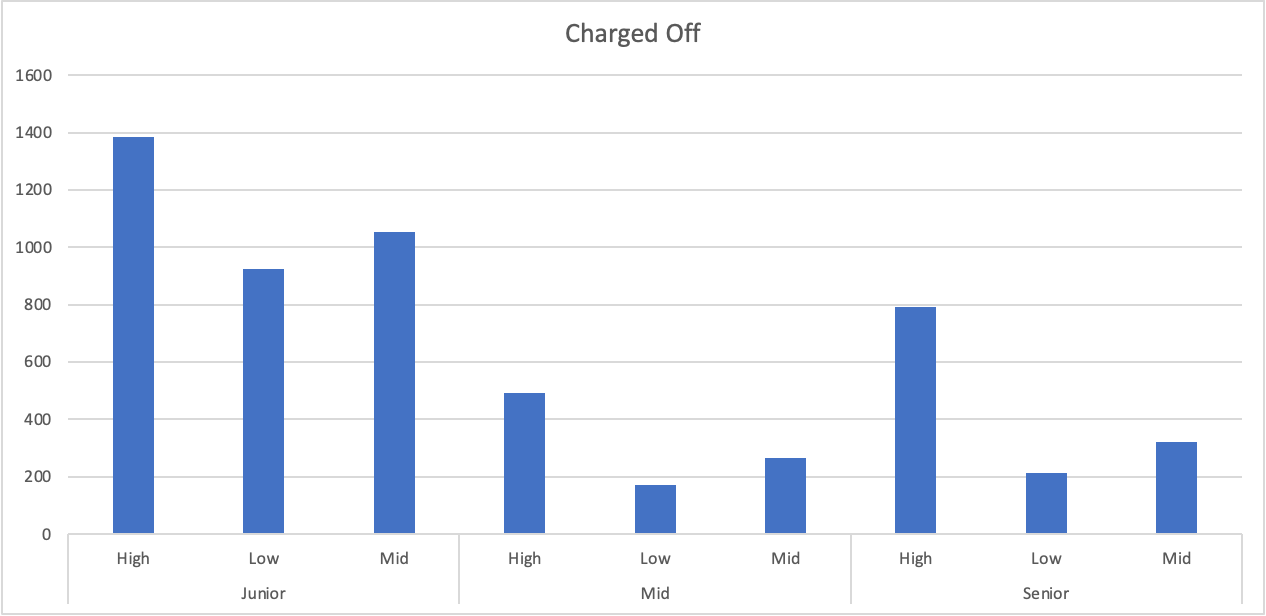

<AxesSubplot:>

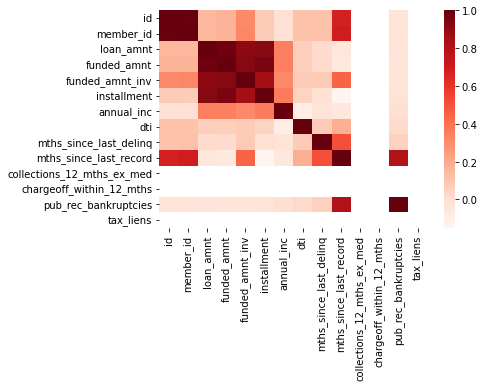

In [23]:
sb.heatmap(df[df["loan_status"] == 'Charged Off'].corr(), cmap="Reds")

<AxesSubplot:>

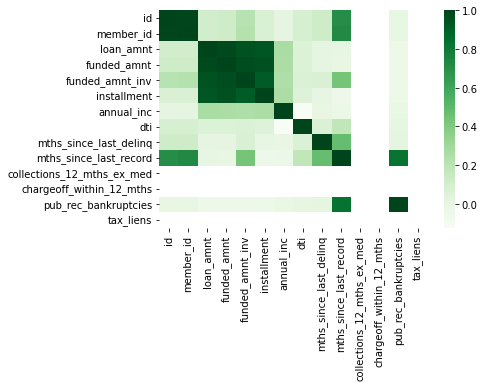

In [24]:
sb.heatmap(df[df["loan_status"] == 'Fully Paid'].corr(),cmap="Greens")

In [25]:
tr0 = go.Bar(
            x = df[df["credit_risk"]== 'good']["credit_risk"].value_counts().index.values,
            y = df[df["credit_risk"]== 'good']["credit_risk"].value_counts().values,
            name='Good credit'
    )

tr1 = go.Bar(
            x = df[df["credit_risk"]== 'bad']["credit_risk"].value_counts().index.values,
            y = df[df["credit_risk"]== 'bad']["credit_risk"].value_counts().values,
            name='Bad credit'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Dependent variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [26]:
df_good        = df.loc[df["credit_risk"] == 'good']['emp_length'].values.tolist()
df_bad         = df.loc[df["credit_risk"] == 'bad' ]['emp_length'].values.tolist()
df_emp_length  = df['emp_length'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
tr2 = go.Histogram(
    x=df_emp_length,
    histnorm='probability',
    name="Overall Experience"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Experience Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



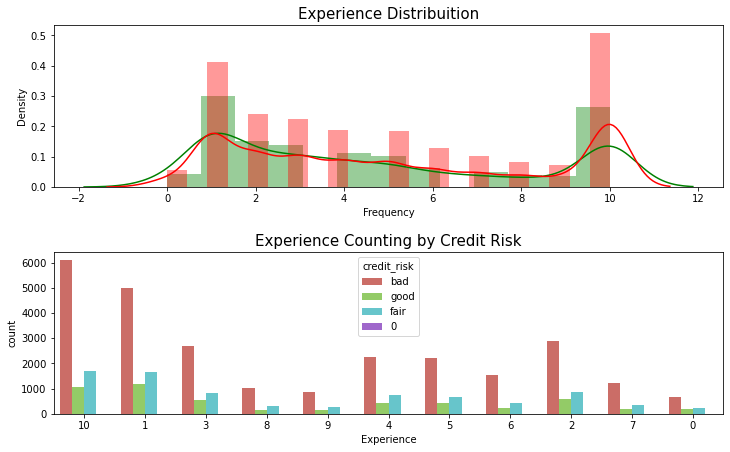

In [27]:
df_good = df[df["credit_risk"] == 'good']
df_bad  = df[df["credit_risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sb.distplot(df_good["emp_length"], ax=ax[0], 
             color="g")
g1 = sb.distplot(df_bad["emp_length"], ax=ax[0], 
             color='r')
g1.set_title("Experience Distribuition", fontsize=15)
g1.set_xlabel("Experience")
g1.set_xlabel("Frequency")

g2 = sb.countplot(x="emp_length",data=df, 
              palette="hls", ax=ax[1], 
              hue = "credit_risk")
g2.set_title("Experience Counting by Credit Risk", fontsize=15)
g2.set_xlabel("Experience")
plt.show()


In [28]:
df_good = df[df["credit_risk"] == 'good']
df_bad  = df[df["credit_risk"] == 'bad']

tr0 = go.Box(
    y=df_good["loan_amnt"],
    x=df_good["emp_sen_level"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_bad['loan_amnt'],
    x=df_bad['emp_sen_level'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Loan Amount',
        zeroline=False
    ),
    xaxis=dict(
        title='Seniority'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [29]:
#First plot
tr0 = go.Bar(
    x = df[df["credit_risk"]== 'good']["home_ownership"].value_counts().index.values,
    y = df[df["credit_risk"]== 'good']["home_ownership"].value_counts().values,
    name='Good credit'
)

#Second plot
tr1 = go.Bar(
    x = df[df["credit_risk"]== 'bad']["home_ownership"].value_counts().index.values,
    y = df[df["credit_risk"]== 'bad']["home_ownership"].value_counts().values,
    name="Bad Credit"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

In [30]:
#Distribuition of Loan amount by Home Ownership
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['home_ownership'],
            "y": df_good['loan_amnt'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['home_ownership'],
            "y": df_bad['loan_amnt'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

In [31]:
#First plot
tr0 = go.Bar(
    x = df[df["credit_risk"]== 'good']["grade"].value_counts().index.values,
    y = df[df["credit_risk"]== 'good']["grade"].value_counts().values,
    name='Good credit'
)

#First plot 2
tr1 = go.Bar(
    x = df[df["credit_risk"]== 'bad']["grade"].value_counts().index.values,
    y = df[df["credit_risk"]== 'bad']["grade"].value_counts().values,
    name="Bad Credit"
)

#Second plot
tr2 = go.Box(
    x = df[df["credit_risk"]== 'good']["grade"],
    y = df[df["credit_risk"]== 'good']["loan_amnt"],
    name=tr0.name
)

#Second plot 2
tr3 = go.Box(
    x = df[df["credit_risk"]== 'bad']["grade"],
    y = df[df["credit_risk"]== 'bad']["loan_amnt"],
    name=tr1.name
)

data = [tr0, tr1, tr2,tr3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Grade', 'Loan Amount by Grade'))

fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 1, 2)

fig['layout'].update(height=400, width=800, title='Grade Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

